In [1]:
%%capture
from datetime import datetime as dt, timedelta
import pandas as pd
from LSTM_Net import LSTM_Model
from Processing import prepare_data
import warnings
warnings.filterwarnings("ignore")
import numpy as np
%matplotlib inline

In [2]:
input_file = 'data/chilectra.csv'
df = pd.read_csv(input_file)
all_X = prepare_data(df, hours_prior=24)

In [3]:
all_y = df['load'][24:]

In [4]:
predictions, model, history = LSTM_Model(all_X, all_y, hours_prior=24, EPOCHS=50)

lute_error: 4.4556 - mean_squared_error: 33.9478 - val_loss: 9.8772 - val_mean_absolute_error: 2.1227 - val_mean_squared_error: 9.8772
Epoch 4/50
1340/1341 [============================>.] - ETA: 0s - loss: 32.2167 - mean_absolute_error: 4.3374 - mean_squared_error: 32.2167
Epoch 00004: val_loss improved from 9.87722 to 9.18528, saving model to checkpoints/Weights.hdf5
1341/1341 [==============================] - 27s 20ms/step - loss: 32.2070 - mean_absolute_error: 4.3369 - mean_squared_error: 32.2070 - val_loss: 9.1853 - val_mean_absolute_error: 2.0565 - val_mean_squared_error: 9.1853
Epoch 5/50
1341/1341 [==============================] - ETA: 0s - loss: 30.7720 - mean_absolute_error: 4.2154 - mean_squared_error: 30.7720
Epoch 00005: val_loss did not improve from 9.18528
1341/1341 [==============================] - 26s 19ms/step - loss: 30.7720 - mean_absolute_error: 4.2154 - mean_squared_error: 30.7720 - val_loss: 9.6236 - val_mean_absolute_error: 2.1345 - val_mean_squared_error: 9.

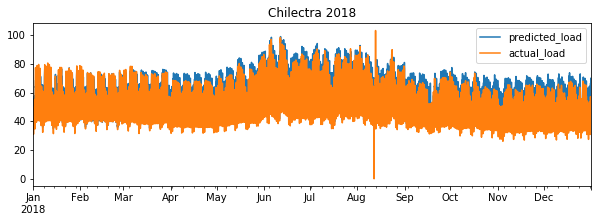

In [7]:
df_r = pd.DataFrame()
df_r['predicted_load'] = predictions
df_r['actual_load'] = [float(f) for f in all_y[-8760:]]
df_r.index = [dt(2018, 1, 1, 0) + timedelta(hours=1)*i for i in range(8760)]
df_r.plot(figsize=(10, 3), title="Chilectra 2018")

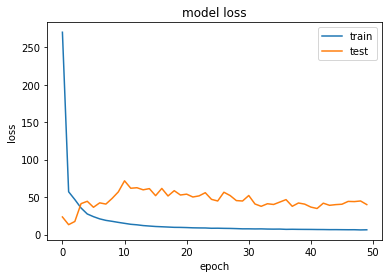

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

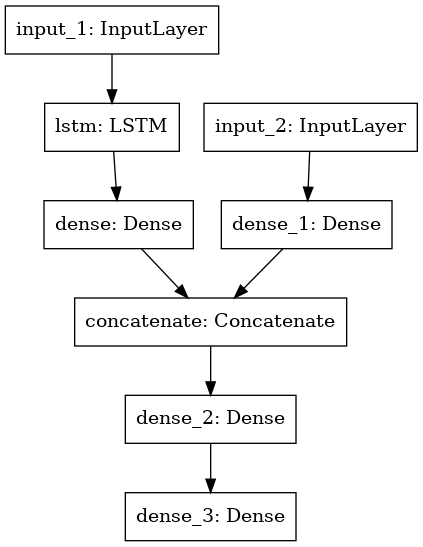

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')